<a href="https://colab.research.google.com/github/puneat/Audio_Sentiment/blob/master/end_to_end__model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM, Reshape
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, AveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import sys
import IPython.display as ipd  # To play sound in the notebook
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_test_f=np.load('/gdrive/My Drive/Audio_files/female_x_test.npy')
y_test_f=np.load('/gdrive/My Drive/Audio_files/female_y_test.npy')
X_test_m=np.load('/gdrive/My Drive/Audio_files/male_x_test.npy')
y_test_m=np.load('/gdrive/My Drive/Audio_files/male_y_test.npy')

In [ ]:
X_test=np.concatenate((X_test_f,X_test_m),axis=0)
y_test=np.concatenate((y_test_f,y_test_m),axis=0)

Gender Model

In [ ]:
# loading json and model architecture 
json_file = open('/gdrive/My Drive/Audio_files/saved_models/json/g_gender_2d_gap_cnn_final_2.json', 'r')
gender_model_json = json_file.read()
json_file.close()
gender_model = model_from_json(gender_model_json)

# load weights into new model
gender_model.load_weights("/gdrive/My Drive/Audio_files/saved_models/hdf5/g_gender_2d_gap_cnn_final_2.hdf5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.Adam(lr=0.001, amsgrad=True)
gender_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = gender_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (gender_model.metrics_names[1], score[1]*100))

Female model

In [ ]:
# loading json and model architecture 
json_file = open('/gdrive/My Drive/Audio_files/saved_models/json/g_female_2d_gap_cnn_final_2.json', 'r')
female_model_json = json_file.read()
json_file.close()
female_model = model_from_json(female_model_json)

# load weights into new model
loaded_model.load_weights("/gdrive/My Drive/Audio_files/saved_models/hdf5/g_female_2d_gap_cnn_final_2.hdf5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.Adam(lr=0.001, amsgrad=True)
female_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = female_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (female_model.metrics_names[1], score[1]*100))

Male Model

In [ ]:
# loading json and model architecture 
json_file = open('/gdrive/My Drive/Audio_files/saved_models/json/g_male_2d_gap_cnn_final.json', 'r')
male_model_json = json_file.read()
json_file.close()
male_model = model_from_json(male_model_json)

# load weights into new model
male_model.load_weights("/gdrive/My Drive/Audio_files/saved_models/hdf5/g_male_2d_gap_cnn_final.hdf5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.Adam(lr=0.001, amsgrad=True)
male_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = male_model.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (male_model.metrics_names[1], score[1]*100))

In [ ]:
preds_gender = gender_model.predict(X_test, 
                         batch_size=100, 
                         verbose=1)
preds_gender=preds_gender.argmax(axis=1)
preds_gender

8435/8435 [==============================] - 3s 356us/step


array([0, 5, 2, ..., 0, 5, 4])

In [ ]:
X_test[0]

In [ ]:
for i in range(0,len(preds_gender)):
  if preds_gender[i]==0:
    preds_to_female.append(X_test[i])
  elif preds_gender[i]==1:
    preds_to_male.append(X_test[i])

In [ ]:
# predictions 
preds_gender = preds_gender.astype(int).flatten()
# preds = (lb.inverse_transform((preds)))
preds_gender = pd.DataFrame({'predictedvalues': preds_gender})

# Actual labels
actual_gender=y_test.argmax(axis=1)
actual_gender = actual_gender.astype(int).flatten()
# actual = (lb.inverse_transform((actual)))
actual_gender = pd.DataFrame({'actualvalues': actual_gender})

finaldf_gender = actual_gender.join(preds)
finaldf_gender[170:180]

,actualvalues,predictedvalues
170,2,2
171,3,0
172,5,5
173,0,0
174,3,3
175,2,2
176,2,2
177,0,0
178,0,0
179,3,3


In [ ]:
# Write out the predictions to disk
finaldf_gender.to_csv('/gdrive/My Drive/Audio_files/Predictions_gender.csv', index=False)
finaldf_gender.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
0,1308
1,1286
2,1316
3,1314
4,1292
5,1322
6,597


In [ ]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'


0.9688203912270302


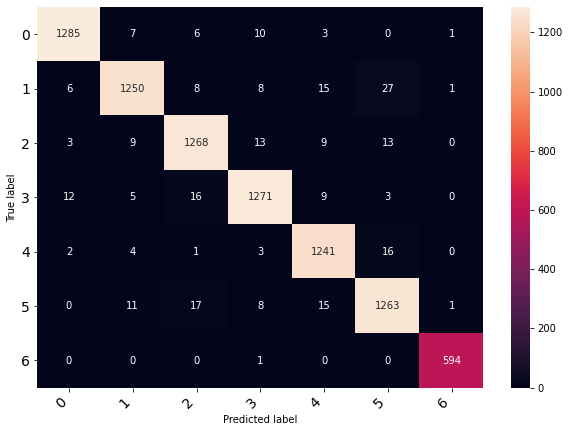

In [ ]:
# Get the predictions file 
finaldf_gender = pd.read_csv("/gdrive/My Drive/Audio_files/Predictions_gender.csv")
classes = finaldf_gender.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [ ]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1312
           1       0.97      0.95      0.96      1315
           2       0.96      0.96      0.96      1315
           3       0.97      0.97      0.97      1316
           4       0.96      0.98      0.97      1267
           5       0.96      0.96      0.96      1315
           6       0.99      1.00      1.00       595

    accuracy                           0.97      8435
   macro avg       0.97      0.97      0.97      8435
weighted avg       0.97      0.97      0.97      8435

